In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from scipy import stats
import math
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [3]:
# Read in the csv file to a dataframe
df = pd.read_csv('./city-data/fully_merged_data.csv')

In [4]:
# Drop columns that have barely any data or that may not be needed. (If needed just remove from the drop list)
df = df.drop(['incident_url', 'source_url', 'incident_url_fields_missing', 'gun_stolen', 'gun_type', 'location_description',
              'n_guns_involved', 'notes', 'participant_name', 'participant_relationship', 'sources', 'state_house_district', 'state_senate_district'], axis=1)
df

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,...,participant_type,Unnamed: 0.1,geocode,population,poverty rate,income,age,property value,employees,wage
0,0,95289,2014-01-01,Michigan,Muskegon,300 block of Monroe Avenue,0,0,2.0,Shots Fired - No Injuries,...,0::Victim,1050.0,05000US26121,172148.0,165197.0,43920.0,39.0,101400.0,74691.0,34640.6
1,1,92307,2014-01-01,Wisconsin,Milwaukee,4700 block of N. 50th St,0,1,4.0,Shot - Wounded/Injured,...,0::Victim,2122.0,05000US55079,951448.0,930552.0,47607.0,34.7,151700.0,2835644.0,45566.0
2,2,92519,2014-01-01,Tennessee,Humboldt,NaN,0,0,8.0,Shots Fired - No Injuries,...,0::Subject-Suspect,NaN,NaN,652752.0,636034.0,38826.0,33.8,96800.0,2860897.0,43781.4
3,3,95244,2014-01-01,Virginia,Chesapeake,405 Shell Rd,0,0,4.0,Shots Fired - No Injuries,...,0::Victim,1999.0,05000US51550,233194.0,225837.0,69978.0,36.7,256500.0,4060169.0,56474.4
4,4,92251,2014-01-01,Ohio,Cleveland,12108 Marne Av,0,1,9.0,Shot - Wounded/Injured,...,0::Victim||1::Subject-Suspect,1485.0,06000US3903516000,145574.0,141161.0,54504.0,41.3,146400.0,72743.0,45369.7
5,5,217091,2014-01-01,Arizona,Phoenix,3400 E Sky Harbor Blvd,0,0,7.0,TSA Action,...,NaN,68.0,16000US0455000,1615041.0,1595700.0,52062.0,33.4,213300.0,2854089.0,46143.6
6,6,92512,2014-01-01,Florida,Riviera Beach,1141 West 31st Street,1,1,20.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Victim||1::Victim||2::Subject-Suspect,NaN,NaN,132378.0,131231.0,46672.0,39.9,225400.0,8756756.0,44699.1
7,7,95236,2014-01-01,Texas,San Antonio,9200 block of West Alametos,0,1,20.0,Shot - Wounded/Injured,...,0::Victim,1921.0,16000US4865000,1492494.0,1469160.0,49268.0,33.5,133900.0,12204129.0,49308.7
8,8,92248,2014-01-01,Virginia,Russell County,Gravel Lick,1,0,9.0,"Shot - Dead (murder, accidental, suicide)",...,0::Victim||1::Subject-Suspect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,165411,2014-01-01,Texas,Corpus Christi,4600 block of Valdez,0,1,27.0,Shot - Wounded/Injured||Domestic Violence,...,0::Victim||1::Subject-Suspect,1824.0,16000US4817000,325734.0,316503.0,54344.0,35.1,132400.0,12204129.0,49308.7


In [5]:
# 3) Replace NaN's in participant_gender with both "unknown" and average of city/county to 
#    get perspective on whether data would be skewed.

# Uncomment following row for unknown replacement
df['participant_gender'] = df['participant_gender'].replace(np.nan, "unknown")

In [6]:
# Find whether or not a city has an abnormal amount of shootings based on proportion to population.
# df1 = df.truncate(before=0, after=10000)


# def createStateDict(df):
#     print("here")
#     stateDict = {}
#     for index in range(len(df)):
#         currentCity = df['city_or_county'][index]
#         currentState = df['state'][index]
        
#         # Creating a dictionary of dictionaries
#         # Adds up the number of people killed in each city for each state
#         if currentState not in stateDict:
#             stateDict[currentState] = {}
#         elif currentCity not in stateDict[currentState]:
#             cityDF = df[df.city_or_county == currentCity]
#             cityDF['population'] = cityDF['population'].replace(np.nan, 0)
#             total_population = max(cityDF['population'])
#             if total_population == 0:
#                 continue
#             print(currentCity, currentState, len(cityDF), len(cityDF) / total_population)
#             stateDict[currentState][currentCity] = len(cityDF) / total_population
    
#     avgDict = {}
#     for state in stateDict:
#         total = 0
#         numCities = 0
#         for city in stateDict[state]:
#             total += stateDict[state][city]
#             numCities += 1
#         if numCities > 0:
#             avgDict[state] = total / numCities
# #     print(list(avgDict.values()))
    
#     return avgDict

# stateAvgs = createStateDict(df)

# r = json.dumps(stateAvgs)
# file = open("./shootingProportions.txt", "w")
# file.write(r)
# file.close()


In [7]:
file = open("./shootingProportions.txt", "r")
averages = file.read()
file.close()
averages = json.loads(averages)
df2 = DataFrame({"Mean": list(averages.values())}, index=averages.keys())

In [8]:
df2['average_income'] = np.nan
for state in df2.index:
    df2['average_income'][state] = df[df['state'] == state]['income'].mean()

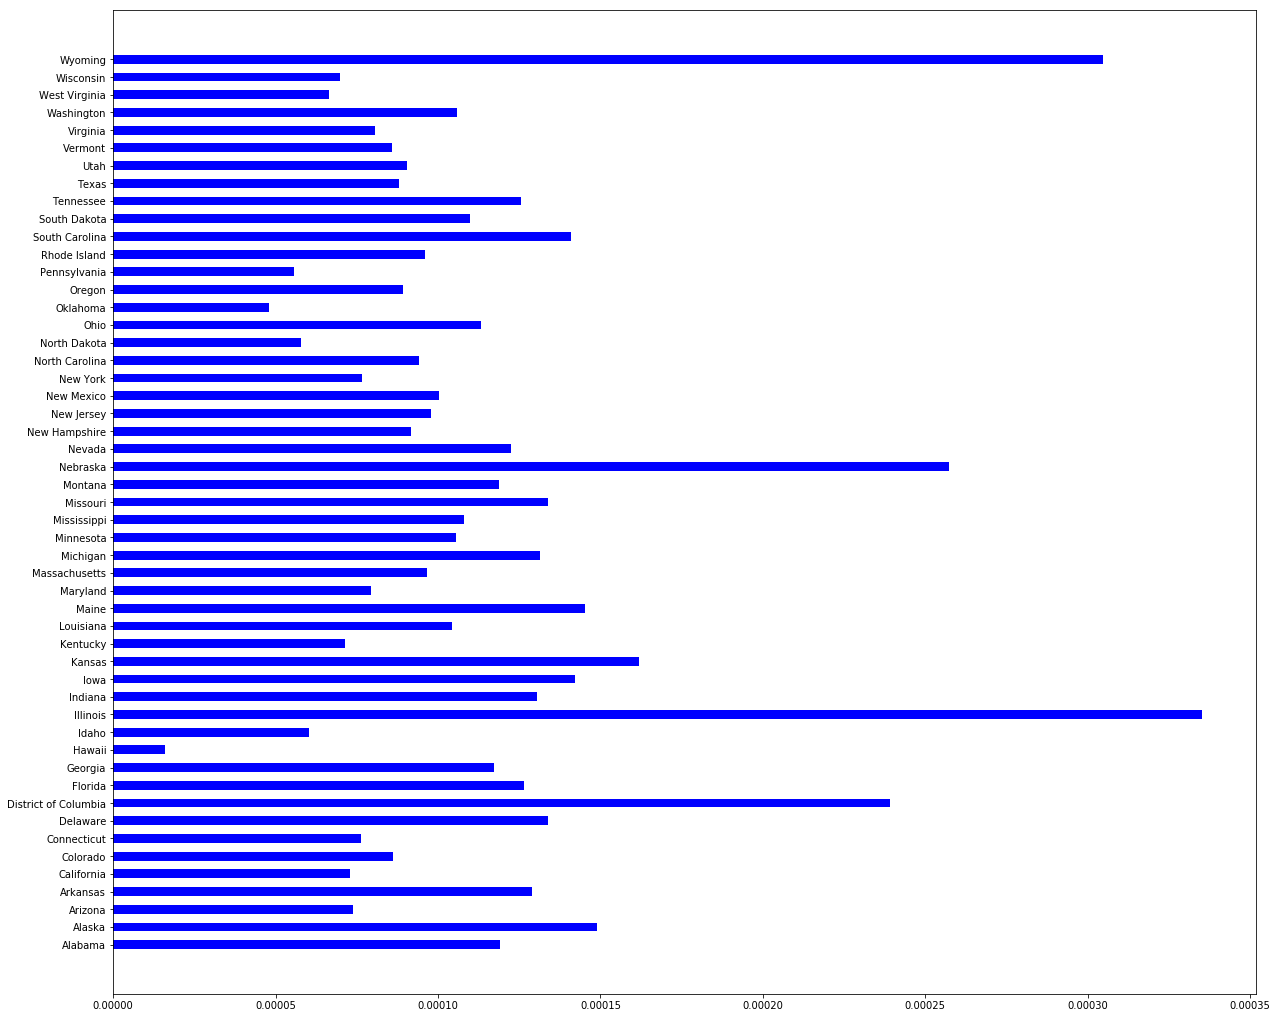

In [9]:
width = 0.5
fig, ax = plt.subplots()
y = df2['Mean']
ind1 = list(df2.index)
ax.barh(ind1, y, width, color="blue")
fig.tight_layout()
fig.set_size_inches(24, 16)


plt.show()
plt.clf()

In [10]:
df2[['Mean','average_income']]

,Mean,average_income
Michigan,0.000132,47904.564439
Wisconsin,0.000070,48874.768485
Tennessee,0.000125,43912.352972
Virginia,0.000081,54517.476085
Ohio,0.000113,52092.603625
Arizona,0.000074,50620.947505
Florida,0.000127,47320.601105
Texas,0.000088,52096.580477
New Jersey,0.000098,66079.815775
Pennsylvania,0.000056,48429.129183


In [11]:
print(df2.nlargest(10, ['Mean', 'average_income']))
print(df2['Mean'].mean())
print(max(df2['average_income']), min(df2['average_income']), df2['average_income'].mean())

                          Mean  average_income
Illinois              0.000335    55169.759022
Wyoming               0.000305    57795.791262
Nebraska              0.000257    72269.000000
District of Columbia  0.000239    75506.000000
Kansas                0.000162    57532.240822
Alaska                0.000149    81476.051607
Maine                 0.000145    57707.669789
Iowa                  0.000142    48231.065436
South Carolina        0.000141    45099.183915
Delaware              0.000134    46834.371734
0.0001143209287897072
81476.0516066 41437.1854426 55570.03093417813
